In [6]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from fiona.crs import from_epsg
from shapely.geometry import Point

# Load Data

In [7]:
path_parks= r'M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\Parks Historical Permits'

In [8]:
#iso= gpd.read_file(r"M:/NY4P Metrics Research 18034/03_GIS+ANALYSIS/01_DATA/Processed/Isochrones/major_park_isochrones_190516.shp")

In [9]:
parkpop= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\190718_10 Min Walksheds with Population_JG\190718_10minwalksheds_pop_3.csv")

In [11]:
parks= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\NYC_PARKS_DATA\NYCPARKS_ALLSITES.shp")

In [13]:
parks.loc[parks['ACRES']<1,'TYPECATEGO']='PP'
parks.loc[(parks['ACRES']>=1)&(parks['ACRES']<=20),'TYPECATEGO']='NP'
parks.loc[(parks['ACRES']>20),'TYPECATEGO']='LP'

In [14]:
parks['TYPECATEGO'].unique()

array(['LP', 'NP', 'PP'], dtype=object)

In [15]:
blocks= gpd.read_file(r"S:\NYC_GIS_DATA\Census block groups 2010\tl_2010_36_bg10.shp")

In [16]:
perms= pd.read_csv(join(path_parks, '190618_ParksPermits_ADDCOLS.csv'), low_memory=False, index_col=0)

In [17]:
perms['start_date_time']= pd.to_datetime(perms['start_date_time'])
perms['end_date_time']= pd.to_datetime(perms['end_date_time'])

perms['year']= perms['start_date_time'].dt.year
perms['start_time']= perms['start_date_time'].dt.time
perms['end_time']= perms['end_date_time'].dt.time

perms['date']= perms['start_date_time'].dt.date
perms['dow']= perms['start_date_time'].dt.weekday

In [18]:
iso= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\Isochrones\190718_Isochrones_JG\190719_10 Min Walksheds with Pop and Pop Density.shp")

In [20]:
iso.loc[iso['ACRES']<1,'TYPECATEGO']='PP'
iso.loc[(iso['ACRES']>=1)&(iso['ACRES']<=20),'TYPECATEGO']='NP'
iso.loc[(iso['ACRES']>20),'TYPECATEGO']='LP'

In [21]:
#min5_mask= iso['walk_mins']==5
#min10_mask= iso['walk_mins']==10
#min15_mask= iso['walk_mins']==15

In [22]:
iso.head()

,GISPROPNUM,LOCATION,COMMUNITYB,COUNCILDIS,PRECINCT,ZIPCODE,BOROUGH,ACRES,ADDRESS,SIGNNAME,...,WATERFRONT,NYS_ASSEMB,NYS_SENATE,US_CONGRES,TYPECATE_1,Pop_nearPa,ShapeArea_,Park Acres,PopDens,geometry
0,Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...","401, 402",26,114,11101,Q,20.340,40-50 VERNON BOULEVARD,Queensbridge Park,...,Yes,37,12,12,None,6153.860292,147.553758,NaN,41.705887,"(POLYGON ((588796.0567545213 4512191.53336101,..."
1,Q465,Vernon Blvd. bet. Broadway and 30 Dr.,401,26,114,11106,Q,6.280,31-30 VERNON BOULEVARD,Socrates Sculpture Park,...,Yes,37,12,12,Neighborhood Park,8372.792193,160.236702,6.28,52.252649,"(POLYGON ((589628.056562691 4513635.977246743,..."
2,B129,"Neptune Ave., Bayview Ave.,W. 24 St. to W. 32 St.",313,47,60,11224,B,26.257,2529 NEPTUNE AVENUE,Kaiser Park,...,Yes,46,23,8,None,15623.529879,235.869145,NaN,66.238125,"POLYGON ((584867.6277183684 4492369.918979734,..."
3,B126,"Halleck St., Bush St. bet. Otsego St. and Cour...",306,38,76,11231,B,58.503,825 HENRY STREET,Red Hook Recreation Area,...,Yes,51,25,"10, 7",None,12392.430368,334.175904,NaN,37.083555,"(POLYGON ((584228.841610563 4502801.231412631,..."
4,R008,"Richmond Ter. To Kill Van Kull, Faber St.",501,49,120,10302,R,4.339,2175 RICHMOND TERRACE,Faber Pool and Park,...,Yes,61,23,11,None,8714.728763,358.382094,NaN,24.316864,"POLYGON ((573018.5522614467 4499248.009505889,..."


In [23]:
iso.shape

(750, 21)

In [24]:
iso['GISPROPNUM'].unique().shape

(750,)

In [25]:
iso= iso.to_crs({'init':'epsg:2263'})

In [26]:
blocks= blocks.to_crs({'init':'epsg:2263'})

In [27]:
parkiso= pd.merge(iso[['GISPROPNUM','geometry']],parkpop,on='GISPROPNUM',how='inner')

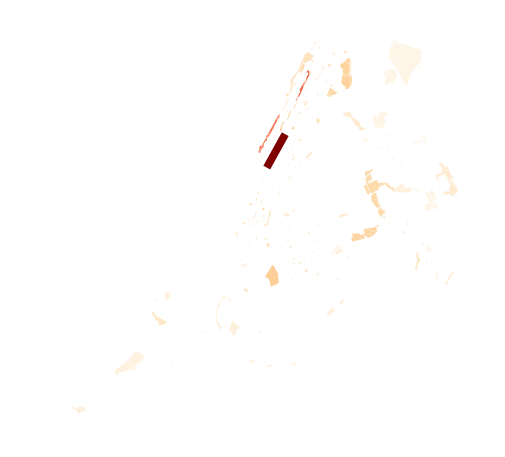

In [28]:
parkiso.plot(column='Pop_nearPark',cmap='OrRd',figsize=(8,8))
plt.axis('off');

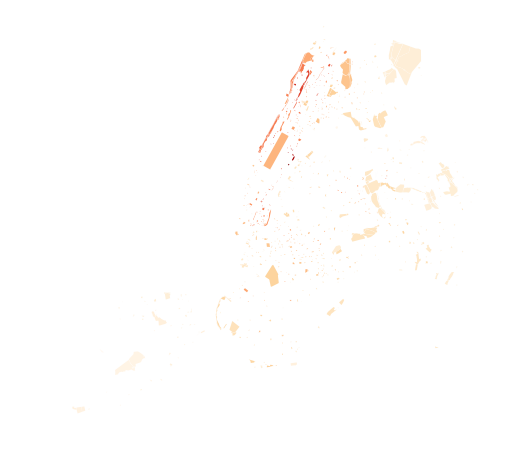

In [29]:
parkiso.plot(column='PopDens',cmap='OrRd',figsize=(8,8))
plt.axis('off');

# Initial Options

In [30]:
path_exp= r"M:\NY4P Metrics Research 18034\05_GRAPHICS\Charts Graphs Diagrams\plt saves\190718 population initial options"

## Total Permits and Events by Park Type, Log Min-Max Normalized

In [31]:
mask_1318= perms['year'].isin(np.arange(2013,2019,1))

In [32]:
y2y= perms[perms['year'].isin(np.arange(2013,2019,1))].groupby(['GISPROPNUM','year']).agg({'GISPROPNUM':'count'}).unstack()

In [33]:
parklist= y2y['GISPROPNUM'].index.unique()

In [34]:
y2y.columns= [2013, 2014, 2015, 2016, 2017, 2018]

In [35]:
y2y.fillna(0, inplace=True)

In [36]:
y2y['tp']= y2y[[2013, 2014, 2015, 2016, 2017, 2018]].sum(axis=1)

### Log Min-Max Normalize

In [37]:
tmax= y2y['tp'].max()
tmin= y2y['tp'].min()

In [38]:
y2y['tp_mm']= (y2y['tp'].apply(lambda x: (x-tmin)/(tmax-tmin))*100).round(0)
y2y['tp_lmm']= (y2y['tp'].apply(lambda x: (np.log(x)-np.log(tmin))/(np.log(tmax)-np.log(tmin)))*100).round(0)

In [ ]:
a= y2y['tp_mm'].values
b= y2y['tp_lmm'].values

bins= np.arange(0, 102, 2)

#plt.hist(aa, bins, alpha=0.5, label='All', color='#dfdfdf')
plt.hist(a, bins, alpha=0.5, label='Min Max Norm', color='#FD5700')
plt.hist(b, bins, alpha=0.5, label='Log Min Max Norm', color='#29D0BF')
#plt.hist(a, bins, alpha=0.5, label='Not Reported', color='#9355B0')

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

plt.savefig(join(path_exp, 'Total Events_MM_LMM.pdf'))

plt.show();

In [221]:
y2y.reset_index(inplace=True)
y2y

,GISPROPNUM,2013,2014,2015,2016,2017,2018,tp,tp_mm,tp_lmm
0,B001,2.0,2.0,3.0,4.0,3.0,6.0,20.0,0.0,28.0
1,B002,5.0,16.0,16.0,19.0,14.0,15.0,85.0,0.0,42.0
2,B006,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,B007,8.0,15.0,21.0,21.0,14.0,20.0,99.0,0.0,44.0
4,B008,17.0,37.0,18.0,25.0,29.0,27.0,153.0,0.0,48.0
5,B016,63.0,84.0,88.0,81.0,43.0,52.0,411.0,1.0,57.0
6,B018,105.0,138.0,153.0,199.0,281.0,312.0,1188.0,3.0,67.0
7,B019,81.0,54.0,75.0,111.0,112.0,108.0,541.0,1.0,60.0
8,B021,57.0,95.0,133.0,123.0,42.0,93.0,543.0,1.0,60.0
9,B022,1.0,6.0,5.0,5.0,0.0,4.0,21.0,0.0,29.0


### Evaluate by Park Type

In [222]:
uparks= perms[~perms[['GISPROPNUM', 'TYPECATEGO']].duplicated()][['GISPROPNUM', 'TYPECATEGO']].reset_index(drop=True)

In [223]:
y2y= pd.merge(uparks, y2y, on='GISPROPNUM', how='right')

In [224]:
park_types= y2y['TYPECATEGO'].unique()

In [225]:
fordf= []

for p in park_types:
    v= y2y[y2y['TYPECATEGO']==p]['tp'].values
    fordf.append([p, v.max(), v.min()])

In [226]:
minmaxes= pd.DataFrame(np.array(fordf), columns=['TYPECATEGO', 'MAX', 'MIN']).set_index('TYPECATEGO')

In [227]:
for n, s in minmaxes.iteritems():
    minmaxes[n]= s.astype(np.float32)

In [228]:
minmaxes['DELTA']= minmaxes['MAX']-minmaxes['MIN']

In [229]:
minmaxes

,MAX,MIN,DELTA
TYPECATEGO,,,
Neighborhood Park,5705.0,1.0,5704.0
Community Park,5412.0,1.0,5411.0
Flagship Park,38611.0,365.0,38246.0
Waterfront Facility,2588.0,1.0,2587.0
Recreation Field/Courts,1916.0,1.0,1915.0
Playground,434.0,1.0,433.0
Nature Area,862.0,1.0,861.0
Triangle/Plaza,1091.0,1.0,1090.0
Jointly Operated Playground,387.0,1.0,386.0


In [230]:
def park_type_adjusted(x, pt, lookup):
    try:
        mi= np.log(lookup.loc[pt, 'MIN'])
        mx= np.log(lookup.loc[pt, 'MAX'])
        dt= mx-mi
        return round((np.log(x)-mi)/dt*100, 0)
    except KeyError:
        return np.nan

In [231]:
y2y['tp_palmm']= [park_type_adjusted(x, pt, minmaxes) for x, pt in y2y[['tp', 'TYPECATEGO']].itertuples(index=False)]

In [232]:
y2y['tp_palmm'].max()

100.0

In [233]:
three_colors= ['#FD5700', '#29D0BF', '#9355B0']

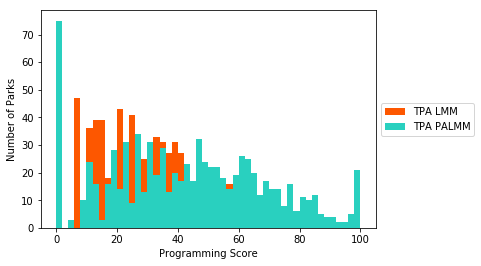

In [234]:
bins= np.arange(0, 102, 2)

tp_lmm= y2y['tp_lmm'].values
tp_palmm= y2y['tp_palmm'].values

plt.hist(tp_lmm, bins,label='TPA LMM', color=three_colors[0])
plt.hist(tp_palmm, bins, label='TPA PALMM', color=three_colors[1])

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

plt.savefig(join(path_exp, 'Total Events_Park Type or Not_LMM.pdf'))

plt.show();

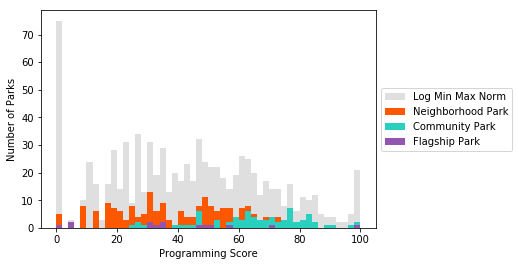

In [235]:
bins= np.arange(0, 102, 2)

plt.hist(y2y['tp_palmm'].values, bins, label='Log Min Max Norm', color='#dfdfdf')

for pt, c in zip(['Neighborhood Park', 'Community Park', 'Flagship Park'], three_colors):
    scores= y2y[y2y['TYPECATEGO']==pt]['tp_palmm'].values
    plt.hist(scores, bins,label=pt, color=c)

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

plt.savefig(join(path_exp, 'Total Events_Park Type 1_LMM.pdf'))

plt.show();

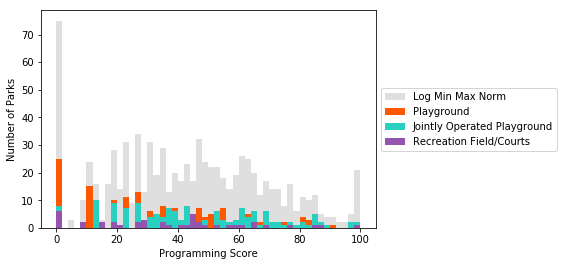

In [236]:
bins= np.arange(0, 102, 2)

plt.hist(y2y['tp_palmm'].values, bins, label='Log Min Max Norm', color='#dfdfdf')

for pt, c in zip(['Playground', 'Jointly Operated Playground', 'Recreation Field/Courts'], three_colors):
    scores= y2y[y2y['TYPECATEGO']==pt]['tp_palmm'].values
    plt.hist(scores, bins,label=pt, color=c)

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

plt.savefig(join(path_exp, 'Total Events_Park Type 2_LMM.pdf'))

plt.show();

## Total Permits and Events per Person by Park Type, Log Min-Max Normalized

In [237]:
parkiso[parkiso['Pop_nearPark']==0].shape
#Six parks have a recorded nearby population of 0

(0, 7)

In [238]:
parkiso[parkiso['GISPROPNUM'].isin(parklist)].shape

(531, 7)

In [239]:
y2y.shape

(830, 12)

In [240]:
y2y= pd.merge(parkiso[['GISPROPNUM', 'Pop_nearPark','PopDens']], y2y,  on='GISPROPNUM', how='right')

In [241]:
no0= y2y[y2y['Pop_nearPark']!=0].copy().dropna(axis=0)

In [242]:
no0.shape

(531, 14)

In [243]:
no0['tppop']= no0['tp']/no0['Pop_nearPark']
no0['tppopdens']= no0['tp']/no0['PopDens']

In [244]:
no0['tppop'].min()

2.252073473275458e-05

In [245]:
no0['tppopdens'].min()

0.005521351486846267

In [246]:
no0.shape

(531, 16)

In [247]:
no0;

### Log Min-Max Normalize

In [248]:
tmax= no0['tppop'].max()
tmin= no0['tppop'].min()
tmaxd= no0['tppopdens'].max()
tmind= no0['tppopdens'].min()

no0['tppop_mm']= no0['tppop'].apply(lambda x: (x-tmin)/(tmax-tmin))*100
no0['tppop_lmm']= no0['tppop'].apply(lambda x: (np.log(x)-np.log(tmin))/(np.log(tmax)-np.log(tmin)))*100

no0['tppopdens_mm']= no0['tppopdens'].apply(lambda x: (x-tmind)/(tmaxd-tmind))*100
no0['tppopdens_lmm']= no0['tppopdens'].apply(lambda x: (np.log(x)-np.log(tmind))/(np.log(tmaxd)-np.log(tmind)))*100

In [249]:
no0

,GISPROPNUM,Pop_nearPark,PopDens,TYPECATEGO,2013,2014,2015,2016,2017,2018,tp,tp_mm,tp_lmm,tp_palmm,tppop,tppopdens,tppop_mm,tppop_lmm,tppopdens_mm,tppopdens_lmm
0,Q104,6153.860292,41.705887,Community Park,63.0,76.0,61.0,51.0,65.0,88.0,404.0,1.0,57.0,70.0,0.065650,9.686882,11.452948,78.641947,2.645662,67.286751
1,Q465,8372.792193,52.252649,Neighborhood Park,23.0,32.0,21.0,45.0,14.0,26.0,161.0,0.0,48.0,59.0,0.019229,3.081183,3.351808,66.537400,0.840498,56.968789
2,B129,15623.529879,66.238125,Community Park,69.0,142.0,162.0,151.0,172.0,110.0,806.0,2.0,63.0,78.0,0.051589,12.168219,8.999094,76.265930,3.323747,69.341004
3,B126,12392.430368,37.083555,Community Park,52.0,109.0,92.0,31.0,24.0,49.0,357.0,1.0,56.0,68.0,0.028808,9.626909,5.023480,70.522240,2.629273,67.230810
4,R008,8714.728763,24.316864,Community Park,7.0,4.0,12.0,11.0,5.0,17.0,56.0,0.0,38.0,47.0,0.006426,2.302929,1.117486,55.732488,0.627821,54.346354
5,B169A,15821.145669,95.974963,Playground,3.0,6.0,4.0,4.0,14.0,5.0,36.0,0.0,34.0,59.0,0.002275,0.375098,0.393167,45.498482,0.100996,37.999609
6,B401,11544.906365,81.879875,Neighborhood Park,5.0,6.0,7.0,12.0,2.0,3.0,35.0,0.0,34.0,41.0,0.003032,0.427455,0.525136,48.326996,0.115304,39.176586
7,Q126,2108.584382,12.769646,Neighborhood Park,8.0,8.0,12.0,16.0,12.0,21.0,77.0,0.0,41.0,50.0,0.036517,6.029925,6.368899,72.859900,1.646312,63.016753
8,Q004,24918.813302,58.974097,Community Park,208.0,270.0,219.0,266.0,165.0,241.0,1369.0,4.0,68.0,84.0,0.054938,23.213581,9.583642,76.886055,6.342155,75.159175
9,Q471,4478.049622,31.088255,Neighborhood Park,4.0,69.0,62.0,39.0,19.0,51.0,244.0,1.0,52.0,64.0,0.054488,7.848623,9.505040,76.804904,2.143314,65.391218


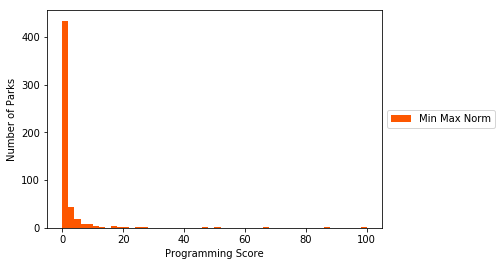

In [250]:
a= no0['tppop_mm'].values
b= no0['tppop_lmm'].values

bins= np.arange(0, 102, 2)

plt.hist(a, bins, label='Min Max Norm', color='#FD5700')
#plt.hist(b, bins, label='Log Min Max Norm', color='#29D0BF')

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

#plt.ylim((0,80))

plt.savefig(join(path_exp, 'Total Events by Population_MM.pdf'))

plt.show();

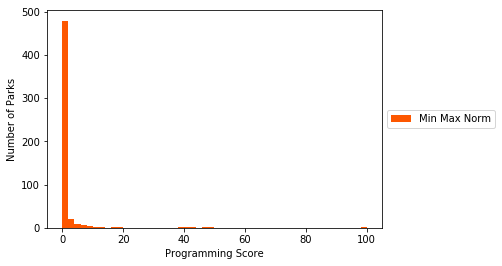

In [251]:
a= no0['tppopdens_mm'].values
b= no0['tppopdens_lmm'].values

bins= np.arange(0, 102, 2)

plt.hist(a, bins, label='Min Max Norm', color='#FD5700')
#plt.hist(b, bins,  label='Log Min Max Norm', color='#29D0BF')

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

#plt.ylim((0,80))

plt.savefig(join(path_exp, 'Total Events by Population Density_MM.pdf'))

plt.show();

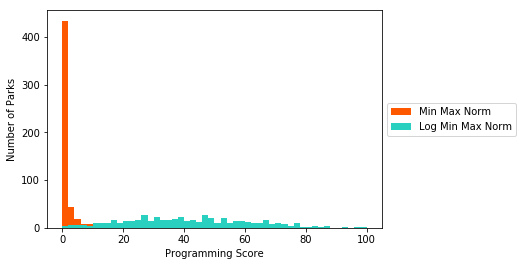

In [252]:
a= no0['tppop_mm'].values
b= no0['tppop_lmm'].values

bins= np.arange(0, 102, 2)

plt.hist(a, bins, label='Min Max Norm', color='#FD5700')
plt.hist(b, bins, label='Log Min Max Norm', color='#29D0BF')

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

#plt.ylim((0,80))

plt.savefig(join(path_exp, 'Total Events by Population_MM_LMM.pdf'))

plt.show();

### Evaluate by Park Type

In [253]:
fordf2= []

for p in park_types:
    v= no0[no0['TYPECATEGO']==p]['tppop'].values
    if len(v)>0:
        fordf2.append([p, v.max(), v.min()])

minmaxes2= pd.DataFrame(np.array(fordf2), columns=['TYPECATEGO', 'MAX', 'MIN']).set_index('TYPECATEGO')

In [254]:
minmaxes2

,MAX,MIN
TYPECATEGO,,
Neighborhood Park,0.57303944279197,3.543989793319508e-05
Community Park,0.38354007309141985,5.244677376068297e-05
Flagship Park,0.49758842704892586,0.007281733574262012
Waterfront Facility,6.625718578582202e-05,6.625718578582202e-05
Playground,0.015712477381962547,2.252073473275458e-05
Triangle/Plaza,0.006521264209295673,4.7373462574991774e-05
Jointly Operated Playground,0.04720078484112723,3.541330777024345e-05
Mall,0.013356176966871209,0.013356176966871209
Historic House Park,0.010045696161898009,0.010045696161898009


In [255]:
fordf2= []

for p in park_types:
    v= no0[no0['TYPECATEGO']==p]['tppopdens'].values
    if len(v)>0:
        fordf2.append([p, v.max(), v.min()])

minmaxes3= pd.DataFrame(np.array(fordf2), columns=['TYPECATEGO', 'MAX', 'MIN']).set_index('TYPECATEGO')

In [256]:
no0.loc[no0['tppop'].sort_values(ascending=False).head(10).index]

,GISPROPNUM,Pop_nearPark,PopDens,TYPECATEGO,2013,2014,2015,2016,2017,2018,tp,tp_mm,tp_lmm,tp_palmm,tppop,tppopdens,tppop_mm,tppop_lmm,tppopdens_mm,tppopdens_lmm
494,M008,9955.684677,31.343446,Neighborhood Park,778.0,863.0,991.0,1156.0,908.0,1009.0,5705.0,15.0,82.0,100.0,0.573039,182.015724,100.000000,100.000000,49.738623,93.709256
251,Q021,6843.004811,19.811084,Flagship Park,530.0,573.0,607.0,615.0,614.0,466.0,3405.0,9.0,77.0,48.0,0.497588,171.873481,86.832672,98.608266,46.967014,93.192804
284,Q020,2015.434773,24.524034,Community Park,97.0,106.0,145.0,94.0,165.0,166.0,773.0,2.0,63.0,77.0,0.383540,31.520100,66.929533,96.041999,8.612109,77.914525
519,X307,460.935147,3.755229,Neighborhood Park,11.0,17.0,26.0,30.0,22.0,28.0,134.0,0.0,46.0,57.0,0.290713,35.683574,50.729885,93.310346,9.749878,79.032067
469,X126,6192.462199,46.650976,Flagship Park,349.0,438.0,241.0,204.0,212.0,245.0,1689.0,4.0,70.0,33.0,0.272751,36.205030,47.595180,92.681630,9.892378,79.162748
458,Q458,2181.865999,17.603719,Neighborhood Park,70.0,147.0,19.0,33.0,23.0,41.0,333.0,1.0,55.0,67.0,0.152622,18.916457,26.630825,86.958233,5.167864,73.315250
498,M010,255250.344709,105.512163,Flagship Park,5197.0,5884.0,7050.0,7010.0,6065.0,7405.0,38611.0,100.0,100.0,100.0,0.151267,365.938854,26.394449,86.870357,100.000000,100.000000
385,B251,3582.205456,15.766447,Community Park,25.0,94.0,97.0,98.0,107.0,104.0,525.0,1.0,59.0,73.0,0.146558,33.298561,25.572585,86.558575,9.098116,78.408947
530,B073,72694.257384,68.318136,Flagship Park,1758.0,1731.0,1962.0,1738.0,1394.0,1564.0,10147.0,26.0,87.0,71.0,0.139585,148.525715,24.355667,86.078021,40.586681,91.877673
185,R013,11803.602777,9.351764,Flagship Park,0.0,31.0,365.0,365.0,370.0,337.0,1468.0,4.0,69.0,30.0,0.124369,156.975734,21.700282,84.940241,42.895850,92.376098


In [257]:
for n, s in minmaxes2.iteritems():
    minmaxes2[n]= s.astype(np.float32)

In [258]:
for n, s in minmaxes3.iteritems():
    minmaxes3[n]= s.astype(np.float32)

In [259]:
no0['tpc_ppoplmm']= [park_type_adjusted(x, pt, minmaxes2) for x, pt in no0[['tppop', 'TYPECATEGO']].itertuples(index=False)]

C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


In [260]:
no0[no0['tpc_ppoplmm']==np.inf].loc[:]

,GISPROPNUM,Pop_nearPark,PopDens,TYPECATEGO,2013,2014,2015,2016,2017,2018,...,tp_mm,tp_lmm,tp_palmm,tppop,tppopdens,tppop_mm,tppop_lmm,tppopdens_mm,tppopdens_lmm,tpc_ppoplmm
424,R028,13737.226149,26.575826,Historic House Park,30.0,18.0,25.0,19.0,23.0,23.0,...,0.0,47.0,100.0,0.010046,5.192689,1.749194,60.137014,1.417517,61.670255,inf
470,Q435,6513.840017,36.229560,Mall,10.0,9.0,9.0,9.0,1.0,49.0,...,0.0,42.0,71.0,0.013356,2.401354,2.326922,62.944851,0.654718,54.723337,inf


In [261]:
no0['tpc_ppopdenslmm']= [park_type_adjusted(x, pt, minmaxes3) for x, pt in no0[['tppopdens', 'TYPECATEGO']].itertuples(index=False)]

C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


In [262]:
no0['tpc_ppoplmm']= no0['tpc_ppoplmm'].abs()

In [263]:
no0['tpc_ppopdenslmm']= no0['tpc_ppopdenslmm'].abs()

In [264]:
tpc_ppoplmm= no0['tpc_ppoplmm'].values

In [265]:
tpc_ppopdenslmm= no0['tpc_ppopdenslmm'].values

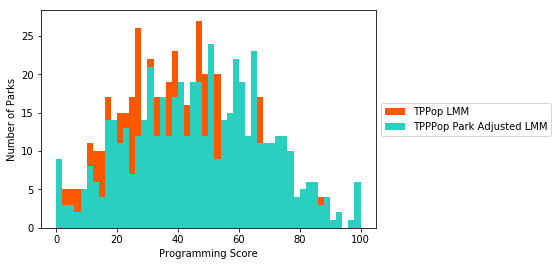

In [266]:
bins= np.arange(0, 102, 2)

tpa_lmm= no0['tppop_lmm'].values
tpa_palmm= no0['tpc_ppoplmm'].values

plt.hist(tpa_lmm, bins, label='TPPop LMM', color=three_colors[0])
plt.hist(tpa_palmm, bins, label='TPPPop Park Adjusted LMM', color=three_colors[1])

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

#plt.ylim((0,80))

plt.savefig(join(path_exp, 'Total Events by Population and Park Type or Not_LMM.pdf'))

plt.show();

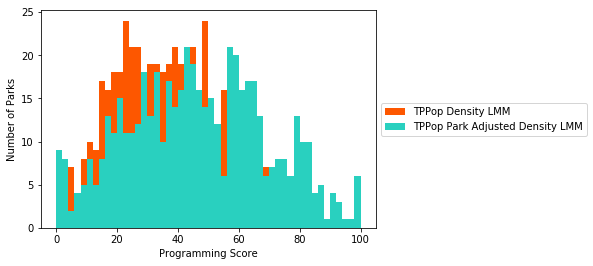

In [267]:
bins= np.arange(0, 102, 2)

tpa_lmm= no0['tppopdens_lmm'].values
tpa_palmm= no0['tpc_ppopdenslmm'].values

plt.hist(tpa_lmm, bins, label='TPPop Density LMM', color=three_colors[0])
plt.hist(tpa_palmm, bins, label='TPPop Park Adjusted Density LMM', color=three_colors[1])

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

#plt.ylim((0,80))

plt.savefig(join(path_exp, 'Total Events by Population Density and Park Type or Not_LMM.pdf'))

plt.show();

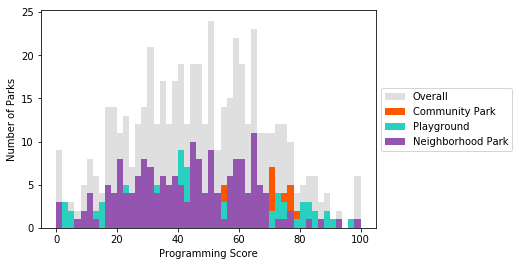

In [268]:
bins= np.arange(0, 102, 2)
tpa_palmm= no0['tpc_ppoplmm'].values
plt.hist(tpa_palmm, bins, label='Overall', color='#dfdfdf')

for pt, c in zip(['Community Park', 'Playground','Neighborhood Park'],three_colors):
    scores= no0[no0['TYPECATEGO']==pt]['tpc_ppoplmm'].values
    plt.hist(scores, bins, label=pt, color=c)

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

plt.savefig(join(path_exp, 'Total Events by Population_Park Type 1_LMM.pdf'))

plt.show();

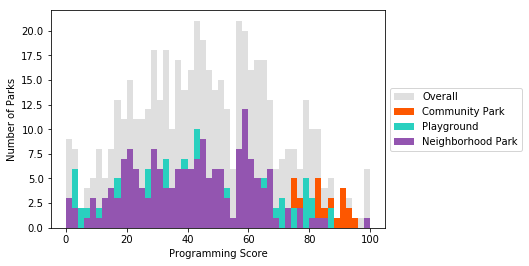

In [269]:
bins= np.arange(0, 102, 2)
tpa_palmm= no0['tpc_ppopdenslmm'].values
plt.hist(tpa_palmm, bins,label='Overall', color='#dfdfdf')

for pt, c in zip(['Community Park', 'Playground','Neighborhood Park'],three_colors):
    scores= no0[no0['TYPECATEGO']==pt]['tpc_ppopdenslmm'].values
    plt.hist(scores, bins, label=pt, color=c)

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

plt.savefig(join(path_exp, 'Total Events by Population Density_Park Type 1_LMM.pdf'))

plt.show();

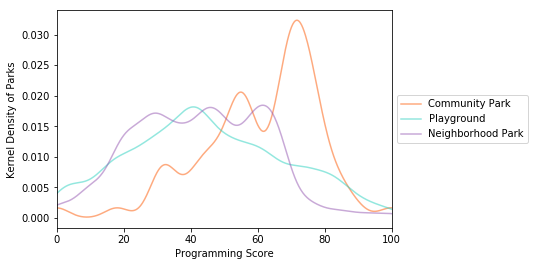

In [270]:
fig, ax= plt.subplots()

for pt, c in zip(['Community Park', 'Playground','Neighborhood Park'], three_colors):
    no0[no0['TYPECATEGO']==pt]['tpc_ppoplmm'].reset_index(drop=True)\
        .plot.kde(ax=ax, alpha=0.5, label=pt, color=c, bw_method=0.2)

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Kernel Density of Parks')
plt.xlim((0,100))

plt.savefig(join(path_exp, 'Total Events by Population_Park Type 1_LMM_KDE.pdf'))

plt.show();

In [271]:
no0.head(2)

,GISPROPNUM,Pop_nearPark,PopDens,TYPECATEGO,2013,2014,2015,2016,2017,2018,...,tp_lmm,tp_palmm,tppop,tppopdens,tppop_mm,tppop_lmm,tppopdens_mm,tppopdens_lmm,tpc_ppoplmm,tpc_ppopdenslmm
0,Q104,6153.860292,41.705887,Community Park,63.0,76.0,61.0,51.0,65.0,88.0,...,57.0,70.0,0.065650,9.686882,11.452948,78.641947,2.645662,67.286751,80.0,79.0
1,Q465,8372.792193,52.252649,Neighborhood Park,23.0,32.0,21.0,45.0,14.0,26.0,...,48.0,59.0,0.019229,3.081183,3.351808,66.537400,0.840498,56.968789,65.0,59.0


# ABCDF Scoring

In [272]:
scoring= \
pd.read_html(r'https://www.mooxye.com/blog/en/american-grading-system-and-gpa/', skiprows=1)[0]\
    .rename(columns={0:'Grade Range', 1:'Grade', 2:'GPA'})

In [273]:
scoring['Lower']= pd.to_numeric(scoring['Grade Range'].str.split('-| ').apply(lambda x: x[0]), errors='coerce')
scoring['Upper']= pd.to_numeric(scoring['Grade Range'].str.split('-| ').apply(lambda x: x[1]), errors='coerce')

In [274]:
scoring.at[11,'Lower']= 0

In [275]:
scoring= scoring[::-1].reset_index(drop=True)

In [276]:
no0['tp_grade']= \
pd.cut(no0['tp_palmm'],
       bins=np.insert(scoring['Upper'].values, 0, -1),
       include_lowest=False, labels=scoring['Grade'].values)
no0['tp_grade']= no0['tp_grade'].astype(str)

no0['tppop_grade']= \
pd.cut(no0['tpc_ppoplmm'],
       bins=np.insert(scoring['Upper'].values, 0, -1),
       include_lowest=False, labels=scoring['Grade'].values)
no0['tppop_grade']= no0['tppop_grade'].astype(str)

no0['tppopdens_grade']= \
pd.cut(no0['tpc_ppopdenslmm'],
       bins=np.insert(scoring['Upper'].values, 0, -1),
       include_lowest=False, labels=scoring['Grade'].values)
no0['tppopdens_grade']= no0['tppopdens_grade'].astype(str)

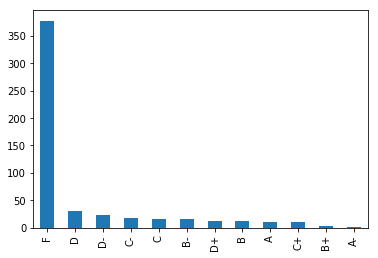

In [277]:
no0['tp_grade'].value_counts().plot.bar();

In [278]:
(no0['tp_grade'].value_counts()/825*100).round(0)

F     46.0
D      4.0
D-     3.0
C-     2.0
C      2.0
B-     2.0
D+     2.0
B      1.0
A      1.0
C+     1.0
B+     0.0
A-     0.0
Name: tp_grade, dtype: float64

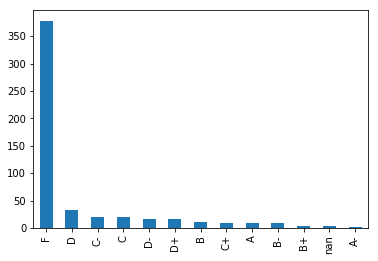

In [279]:
no0['tppop_grade'].value_counts().plot.bar();

In [280]:
(no0['tppopdens_grade'].value_counts()/825*100).round(0)

F      46.0
D       3.0
D-      2.0
C+      2.0
B-      2.0
D+      2.0
C       2.0
C-      1.0
A       1.0
B       1.0
A-      1.0
B+      1.0
nan     0.0
Name: tppopdens_grade, dtype: float64

In [281]:
fff= pd.merge(parks[['GISPROPNUM', 'SIGNNAME']], no0, on='GISPROPNUM', how='right')

In [282]:
fff

,GISPROPNUM,SIGNNAME,Pop_nearPark,PopDens,TYPECATEGO,2013,2014,2015,2016,2017,...,tppopdens,tppop_mm,tppop_lmm,tppopdens_mm,tppopdens_lmm,tpc_ppoplmm,tpc_ppopdenslmm,tp_grade,tppop_grade,tppopdens_grade
0,Q104,Queensbridge Park,6153.860292,41.705887,Community Park,63.0,76.0,61.0,51.0,65.0,...,9.686882,11.452948,78.641947,2.645662,67.286751,80.0,79.0,C-,B-,C+
1,Q465,Socrates Sculpture Park,8372.792193,52.252649,Neighborhood Park,23.0,32.0,21.0,45.0,14.0,...,3.081183,3.351808,66.537400,0.840498,56.968789,65.0,59.0,F,D,F
2,B129,Kaiser Park,15623.529879,66.238125,Community Park,69.0,142.0,162.0,151.0,172.0,...,12.168219,8.999094,76.265930,3.323747,69.341004,77.0,81.0,C+,C+,B-
3,B126,Red Hook Recreation Area,12392.430368,37.083555,Community Park,52.0,109.0,92.0,31.0,24.0,...,9.626909,5.023480,70.522240,2.629273,67.230810,71.0,79.0,D+,C-,C+
4,R008,Faber Pool and Park,8714.728763,24.316864,Community Park,7.0,4.0,12.0,11.0,5.0,...,2.302929,1.117486,55.732488,0.627821,54.346354,54.0,62.0,F,F,D-
5,B169A,Brighton Playground,15821.145669,95.974963,Playground,3.0,6.0,4.0,4.0,14.0,...,0.375098,0.393167,45.498482,0.100996,37.999609,70.0,62.0,F,C-,D-
6,B401,Grand Ferry Park,11544.906365,81.879875,Neighborhood Park,5.0,6.0,7.0,12.0,2.0,...,0.427455,0.525136,48.326996,0.115304,39.176586,46.0,39.0,F,F,F
7,Q126,Francis Lewis Park,2108.584382,12.769646,Neighborhood Park,8.0,8.0,12.0,16.0,12.0,...,6.029925,6.368899,72.859900,1.646312,63.016753,72.0,65.0,F,C-,D
8,Q004,Astoria Park,24918.813302,58.974097,Community Park,208.0,270.0,219.0,266.0,165.0,...,23.213581,9.583642,76.886055,6.342155,75.159175,78.0,89.0,B,C+,B+
9,Q471,Hunter's Point South Park,4478.049622,31.088255,Neighborhood Park,4.0,69.0,62.0,39.0,19.0,...,7.848623,9.505040,76.804904,2.143314,65.391218,76.0,68.0,D,C,D+


In [283]:
fff.sort_values('tppop').tail(10)

,GISPROPNUM,SIGNNAME,Pop_nearPark,PopDens,TYPECATEGO,2013,2014,2015,2016,2017,...,tppopdens,tppop_mm,tppop_lmm,tppopdens_mm,tppopdens_lmm,tpc_ppoplmm,tpc_ppopdenslmm,tp_grade,tppop_grade,tppopdens_grade
185,R013,LaTourette Park & Golf Course,11803.602777,9.351764,Flagship Park,0.0,31.0,365.0,365.0,370.0,...,156.975734,21.700282,84.940241,42.895850,92.376098,67.0,80.0,F,D+,B-
530,B073,Prospect Park,72694.257384,68.318136,Flagship Park,1758.0,1731.0,1962.0,1738.0,1394.0,...,148.525715,24.355667,86.078021,40.586681,91.877673,70.0,79.0,C-,C-,C+
385,B251,Manhattan Beach Park,3582.205456,15.766447,Community Park,25.0,94.0,97.0,98.0,107.0,...,33.298561,25.572585,86.558575,9.098116,78.408947,89.0,93.0,C,B+,A
498,M010,Central Park,255250.344709,105.512163,Flagship Park,5197.0,5884.0,7050.0,7010.0,6065.0,...,365.938854,26.394449,86.870357,100.000000,100.000000,72.0,100.0,A,C-,A
458,Q458,Fort Totten Park,2181.865999,17.603719,Neighborhood Park,70.0,147.0,19.0,33.0,23.0,...,18.916457,26.630825,86.958233,5.167864,73.315250,86.0,77.0,D+,B,C+
469,X126,Ferry Point Park,6192.462199,46.650976,Flagship Park,349.0,438.0,241.0,204.0,212.0,...,36.205030,47.595180,92.681630,9.892378,79.162748,86.0,45.0,F,B,F
519,X307,Barretto Point Park,460.935147,3.755229,Neighborhood Park,11.0,17.0,26.0,30.0,22.0,...,35.683574,50.729885,93.310346,9.749878,79.032067,93.0,83.0,F,A,B
284,Q020,Highland Park,2015.434773,24.524034,Community Park,97.0,106.0,145.0,94.0,165.0,...,31.520100,66.929533,96.041999,8.612109,77.914525,100.0,92.0,C+,A,A-
251,Q021,Cunningham Park,6843.004811,19.811084,Flagship Park,530.0,573.0,607.0,615.0,614.0,...,171.873481,86.832672,98.608266,46.967014,93.192804,100.0,82.0,F,A,B-
494,M008,Bryant Park,9955.684677,31.343446,Neighborhood Park,778.0,863.0,991.0,1156.0,908.0,...,182.015724,100.000000,100.000000,49.738623,93.709256,100.0,100.0,A,A,A


In [284]:
no0.sort_values('tp').tail(10)

,GISPROPNUM,Pop_nearPark,PopDens,TYPECATEGO,2013,2014,2015,2016,2017,2018,...,tppopdens,tppop_mm,tppop_lmm,tppopdens_mm,tppopdens_lmm,tpc_ppoplmm,tpc_ppopdenslmm,tp_grade,tppop_grade,tppopdens_grade
170,M029,51122.122896,148.876251,Community Park,197.0,231.0,329.0,308.0,367.0,511.0,...,13.051108,6.628863,73.254039,3.565017,69.971954,74.0,82.0,B+,C,B-
472,M042,40363.494707,113.003520,Community Park,151.0,224.0,189.0,439.0,615.0,672.0,...,20.264856,9.897075,77.203165,5.536346,73.935483,79.0,87.0,A-,C+,B+
251,Q021,6843.004811,19.811084,Flagship Park,530.0,573.0,607.0,615.0,614.0,466.0,...,171.873481,86.832672,98.608266,46.967014,93.192804,100.0,82.0,F,A,B-
29,M089,48924.700060,141.190621,Community Park,812.0,591.0,555.0,531.0,870.0,475.0,...,27.154778,13.671988,80.387230,7.419181,76.571724,82.0,90.0,A,B-,A-
497,M052,36823.814247,104.473039,Neighborhood Park,95.0,172.0,221.0,620.0,1043.0,1793.0,...,37.751367,18.687421,83.467041,10.314951,79.539483,83.0,84.0,A,B,B
507,Q099,53495.252793,35.956700,Flagship Park,637.0,719.0,796.0,775.0,959.0,1354.0,...,145.730839,17.090262,82.586523,39.822914,91.706556,62.0,78.0,F,D-,C+
431,M071,147612.174635,148.429677,Community Park,745.0,759.0,888.0,863.0,1154.0,1003.0,...,36.461711,6.394422,72.899301,9.962522,79.226384,74.0,94.0,A,C,A
494,M008,9955.684677,31.343446,Neighborhood Park,778.0,863.0,991.0,1156.0,908.0,1009.0,...,182.015724,100.000000,100.000000,49.738623,93.709256,100.0,100.0,A,A,A
530,B073,72694.257384,68.318136,Flagship Park,1758.0,1731.0,1962.0,1738.0,1394.0,1564.0,...,148.525715,24.355667,86.078021,40.586681,91.877673,70.0,79.0,C-,C-,C+
498,M010,255250.344709,105.512163,Flagship Park,5197.0,5884.0,7050.0,7010.0,6065.0,7405.0,...,365.938854,26.394449,86.870357,100.000000,100.000000,72.0,100.0,A,C-,A


## Exports for Comparison

In [285]:
comp= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\Initial Options\190618_TParks by Acre.csv",index_col=0)

In [286]:
oldgrades= comp.set_index('GISPROPNUM').loc[:,'tp':]

In [287]:
newgrades= no0.set_index('GISPROPNUM').loc[:,'tp':]

In [288]:
newgrades.reset_index(inplace=True)

In [289]:
t= parks['geometry'].copy()

In [290]:
parks['geometry']= parks['geometry'].copy().centroid

In [291]:
to_export= pd.merge(parks,newgrades,on='GISPROPNUM',how='inner')

In [292]:
to_export['TYPECATEGO'].value_counts()

Neighborhood Park              176
Playground                     143
Jointly Operated Playground    125
Community Park                  68
Flagship Park                   12
Triangle/Plaza                   4
Historic House Park              1
Waterfront Facility              1
Mall                             1
Name: TYPECATEGO, dtype: int64

In [293]:
to_export= to_export[~(to_export['tpc_ppoplmm']==np.inf)]

In [294]:
assert to_export[to_export['LOCATION'].isna()].shape[0]==0

In [295]:
to_export['TYPECATEGO'].value_counts()

Neighborhood Park              176
Playground                     143
Jointly Operated Playground    125
Community Park                  68
Flagship Park                   12
Triangle/Plaza                   4
Name: TYPECATEGO, dtype: int64

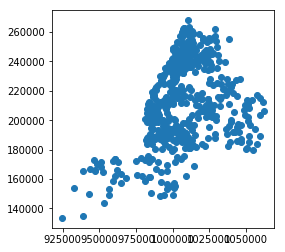

In [296]:
to_export.plot()

In [297]:
to_export.value_counts()

AttributeError: 'GeoDataFrame' object has no attribute 'value_counts'

In [ ]:
to_export['TYPECATEGO'].value_counts()

In [ ]:
to_export['tpc_ppoplmm'].median()

In [ ]:
to_export['tpc_ppoplmm'].quantile(0.25)

In [ ]:
to_export['tpc_ppoplmm'].quantile(0.27)

In [ ]:
to_export['tpc_ppopdenslmm'].median()

In [ ]:
d= [[to_export['tpc_ppoplmm'].median(),to_export['tpc_ppoplmm'].quantile(.25),to_export['tpc_ppoplmm'].quantile(.75)],[to_export['tpc_ppopdenslmm'].median(),to_export['tpc_ppopdenslmm'].quantile(.25),to_export['tpc_ppopdenslmm'].quantile(.75)]]

In [ ]:
d

In [ ]:
summary= pd.DataFrame(data=d,columns=['Median','25th Percentile','75th Percentile'],index=['By Population','By Population Density'])
summary.to_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\Initial Options\190719_SummaryStats.csv")

In [ ]:
t= (to_export.groupby('tppop_grade')['tppop_grade'].value_counts()*100).div(to_export.groupby('tppop_grade')['tppop_grade'].value_counts().sum()).rename('Percent Covered Population').to_frame()

In [ ]:
pd.concat([t,(to_export.groupby('tppopdens_grade')['tppopdens_grade'].value_counts()*100).div(to_export.groupby('tppopdens_grade')['tppopdens_grade'].value_counts().sum()).rename('Percent Covered Population Density').to_frame()],axis=1).to_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\Initial Options\190719_BothIndicators.csv")

In [ ]:
(to_export.groupby('tppopdens_grade')['tppopdens_grade'].value_counts()*100).div(to_export.groupby('tppopdens_grade')['tppopdens_grade'].value_counts().sum()).rename('Percent Covered').to_frame().to_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\Initial Options\190719_PercentCoveredPopDensity.csv")

In [ ]:
to_export.to_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\Initial Options\190719_NewGrades_2.shp")

In [ ]:
gradecomp= pd.merge(oldgrades.reset_index(),newgrades.reset_index(),on='GISPROPNUM',how='inner').rename(columns={'tp_grade_x':'tp_grade_old','tp_grade_y':'tp_grade_new'})
gradecomp.head()

In [ ]:
gradecomp[gradecomp.isna()]

In [ ]:
plt.hist(gradecomp['tpa_palmm'],bins=60,density=True,color='green',alpha=0.5,label='Total Permits per Acre Park Adjusted LMM')
plt.hist(gradecomp['tp_palmm_x'],bins=60,density=True,color='red',alpha=0.5,label='TP Park Adjusted LMM')
plt.hist(gradecomp['tpc_ppoplmm'],bins=60,density=True,alpha=0.8,label='TP per Person Park Adjusted')
plt.legend();

In [ ]:
plt.hist(gradecomp['tpa_palmm'],bins=60,density=True,color='green',alpha=0.5,label='Total Permits per Acre Park Adjusted LMM')
plt.hist(gradecomp['tp_palmm_x'],bins=60,density=True,color='red',alpha=0.5,label='TP Park Adjusted LMM')
plt.hist(gradecomp['tpc_ppopdenslmm'],bins=60,density=True,alpha=0.8,label='TP per Person per Square Mile Park Adjusted')
plt.legend();

In [ ]:
gradecomp= gradecomp.drop(426)

In [ ]:
plt.hist(gradecomp['tpc_ppopdenslmm'],bins=60,label='LMM Population Density Park Adjusted')
plt.hist(gradecomp['tpc_ppoplmm'],bins=60,color='red',label='LMM Permits per Person Park Adjusted')
plt.legend()
plt.savefig(join(path_exp,'190718_Comparison.pdf'));

In [ ]:
gradecomp.set_index('GISPROPNUM')['tpc_ppopdenslmm'].sort_values(ascending=False);

In [ ]:
comp= gradecomp.copy()

In [ ]:
ABchange= sum(comp['tpa_grade'].str.contains('A')&comp['tppop_grade'].str.contains('B'))
BAchange= sum(comp['tpa_grade'].str.contains('B')&comp['tppop_grade'].str.contains('A'))

ACchange= sum(comp['tpa_grade'].str.contains('A')&comp['tppop_grade'].str.contains('C'))
CAchange= sum(comp['tpa_grade'].str.contains('C')&comp['tppop_grade'].str.contains('A'))

BCchange= sum(comp['tpa_grade'].str.contains('B')&comp['tppop_grade'].str.contains('C'))
CBchange= sum(comp['tpa_grade'].str.contains('C')&comp['tppop_grade'].str.contains('B'))

BDchange= sum(comp['tpa_grade'].str.contains('B')&comp['tppop_grade'].str.contains('D'))
DBchange= sum(comp['tpa_grade'].str.contains('D')&comp['tppop_grade'].str.contains('B'))

CDchange= sum(comp['tpa_grade'].str.contains('C')&comp['tppop_grade'].str.contains('D'))
DCchange= sum(comp['tpa_grade'].str.contains('D')&comp['tppop_grade'].str.contains('C'))

ADchange= sum(comp['tpa_grade'].str.contains('A')&comp['tppop_grade'].str.contains('D'))
DAchange= sum(comp['tpa_grade'].str.contains('D')&comp['tppop_grade'].str.contains('A'))

AFchange= sum(comp['tpa_grade'].str.contains('A')&comp['tppop_grade'].str.contains('F'))
FAchange= sum(comp['tpa_grade'].str.contains('F')&comp['tppop_grade'].str.contains('A'))

DFchange= sum(comp['tpa_grade'].str.contains('D')&comp['tppop_grade'].str.contains('F'))
FDchange= sum(comp['tpa_grade'].str.contains('F')&comp['tppop_grade'].str.contains('D'))

BFchange= sum(comp['tpa_grade'].str.contains('B')&comp['tppop_grade'].str.contains('F'))
FBchange= sum(comp['tpa_grade'].str.contains('F')&comp['tppop_grade'].str.contains('B'))


BFchange= sum(comp['tpa_grade'].str.contains('B')&comp['tppop_grade'].str.contains('F'))
FBchange= sum(comp['tpa_grade'].str.contains('F')&comp['tppop_grade'].str.contains('B'))

In [ ]:
#64-sum(comp[['tppop_grade','tpa_grade']]['tppop_grade']==comp[['tppop_grade','tpa_grade']]['tpa_grade'])

In [ ]:
t= comp[['tp_grade_old','tppop_grade']].groupby(['tp_grade_old','tppop_grade']).agg({'tppop_grade':'count'})['tppop_grade'].unstack().fillna(0)
t

In [ ]:
y= comp[['tp_grade_old','tppopdens_grade']].groupby(['tp_grade_old','tppopdens_grade']).agg({'tppopdens_grade':'count'})['tppopdens_grade'].unstack().fillna(0)
y

In [ ]:
#t.to_csv(join(path_exp,'190702_TpA_Grade and TPPop_Grade_Export Score Change.csv'))

In [ ]:
t.plot.bar(width=1,stacked=True,cmap='OrRd',figsize=(16,8))
plt.xlabel('TP Grade')
plt.ylabel('Number of Parks')
plt.legend(loc=(1.03,0))
plt.title('TP Grade to TP Pop Grade');
#plt.savefig(join(path_exp,'190703_TP Grade to TP Pop Grade.pdf'))

In [ ]:
y.plot.bar(width=1,stacked=True,cmap='OrRd',figsize=(16,8))
plt.xlabel('TP Grade')
plt.ylabel('Number of Parks')
plt.legend(loc=(1.03,0))
plt.title('TP Grade to TP Pop Dens Grade');
#plt.savefig(join(path_exp,'190703_TP Grade to TP Pop Dens Grade.pdf'));